In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#importing the datasets as  for loading the datasets model
data = pd.read_csv("/content/drive/MyDrive/prices-split-adjusted.csv")
data.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [4]:
## let see the data set has open price and close and low and high volumn of the stock price along with date columnns
##lets see what days the stock price indicate
len(data.date.unique())


1762

In [6]:
## lets see the data shape and how many columns it has
data.shape
## the dataset has the columns of the  851264 which is quite long/

(851264, 7)

In [7]:
## lets see the type of the data features
data.info()
## date types is not in the form if datetime format its in the form String


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    851264 non-null  object 
 1   symbol  851264 non-null  object 
 2   open    851264 non-null  float64
 3   close   851264 non-null  float64
 4   low     851264 non-null  float64
 5   high    851264 non-null  float64
 6   volume  851264 non-null  float64
dtypes: float64(5), object(2)
memory usage: 45.5+ MB


In [9]:
## lets check the what is the feature symbol	 and check the features values
len(data.symbol.value_counts())
# there are 501 new values in the data set


501

In [11]:
## this tells the descriptions values of the dataset
data.describe()
## it tells that the values range of three column are equal but the volumne column is so much highh
## so the data needs to be convert to same scaling by using the technique as Standerziation and Normializations some methods we have
## before applying into the model

,open,close,low,high,volume
count,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
mean,64.993618,65.011913,64.336541,65.639748,5.415113e+06
std,75.203893,75.201216,74.459518,75.906861,1.249468e+07
min,1.660000,1.590000,1.500000,1.810000,0.000000e+00
25%,31.270000,31.292776,30.940001,31.620001,1.221500e+06
50%,48.459999,48.480000,47.970001,48.959999,2.476250e+06
75%,75.120003,75.139999,74.400002,75.849998,5.222500e+06
max,1584.439941,1578.130005,1549.939941,1600.930054,8.596434e+08


In [12]:
## form this all we can see that the 5 columns may be useful for the model
## lets check wheather the symbol is useful or not
## also lets check wheather we have any null values in the dataset
data.isnull().sum()
## seems like we dont have any null valuue in the dataset

date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64

<ipython-input-18-f987e51a6d74>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cormap =data.corr()
<ipython-input-18-f987e51a6d74>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<Axes: >

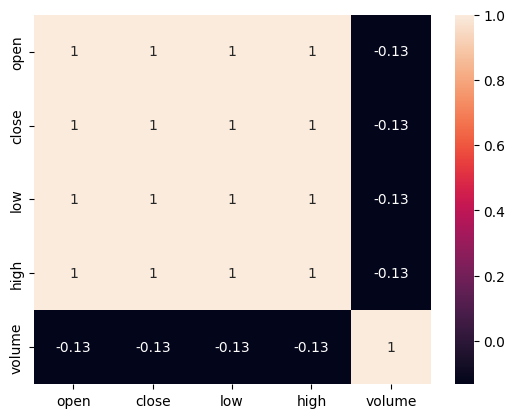

In [18]:
## Symbol denotes the name of  commpany so it use full when we are find the price predictions
## now lets check the  corrections of the data set
import seaborn as sns
cormap =data.corr()
sns.heatmap(data.corr(),annot=True)
## seems as we got the insight form the early that the dataset volume is different form all other columns
## now lets check the ditrubtion of each datasets bcox its import wheen comes to using the macine learning model such as
## Linear Regression it assumes each model has the normal distributions
## here it seems it there is so much multi co relations between the datasets lets understand it clearly in later part


array([[<Axes: title={'center': 'open'}>,
        <Axes: title={'center': 'close'}>],
       [<Axes: title={'center': 'low'}>,
        <Axes: title={'center': 'high'}>]], dtype=object)

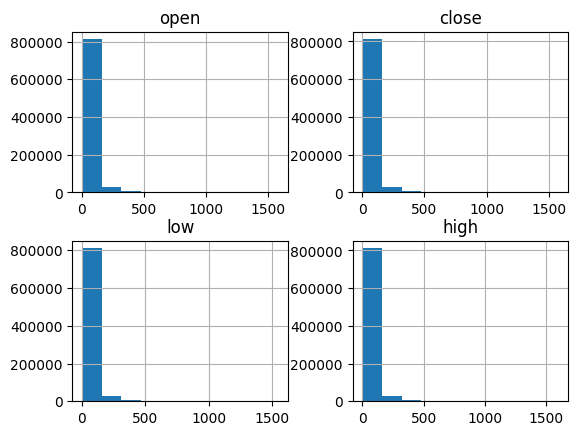

In [16]:
impcolumsn = data.drop('volume',axis=1)
## it seems like all the columns featues are left skewd distributions frist we  will apply the model if the score is less then we go
## for converting the distributions to normal or wheen we do the scaling then it will automatically becomes the normal distributions
impcolumsn.hist()

In [24]:
## er do manual program for checking the corelations of the features in the dataset
def get_corelated_col(cordat, threshold):
   feature  = []
   value = []

   for i,index in enumerate(cordat.index):
    if(abs(cordat[index])>threshold):
      feature.append(index)
      value.append(cordat[index])
    df = pd.DataFrame(data = value, index = feature, columns=['corr value'])
   return df


In [27]:
top_corelated_values = get_corelated_col(cormap['close'], 0.60)
top_corelated_values
## this is our calculated using values to get the proper values instead heatmap rounded values
##Looks like all colums except volume are highly co-related. Using them for predictions.

,corr value
open,0.999845
close,1.000000
low,0.999926
high,0.999925


In [30]:
df = data[top_corelated_values.index]
df.head()
### we made the featues selection by removing the volume column as its corelation is less than throshold and we will use this for the model

,open,close,low,high
0,123.430000,125.839996,122.309998,126.250000
1,125.239998,119.980003,119.940002,125.540001
2,116.379997,114.949997,114.930000,119.739998
3,115.480003,116.620003,113.500000,117.440002
4,117.010002,114.970001,114.089996,117.330002


In [31]:
df.shape
## lets check the shape of the new datset

(851264, 4)

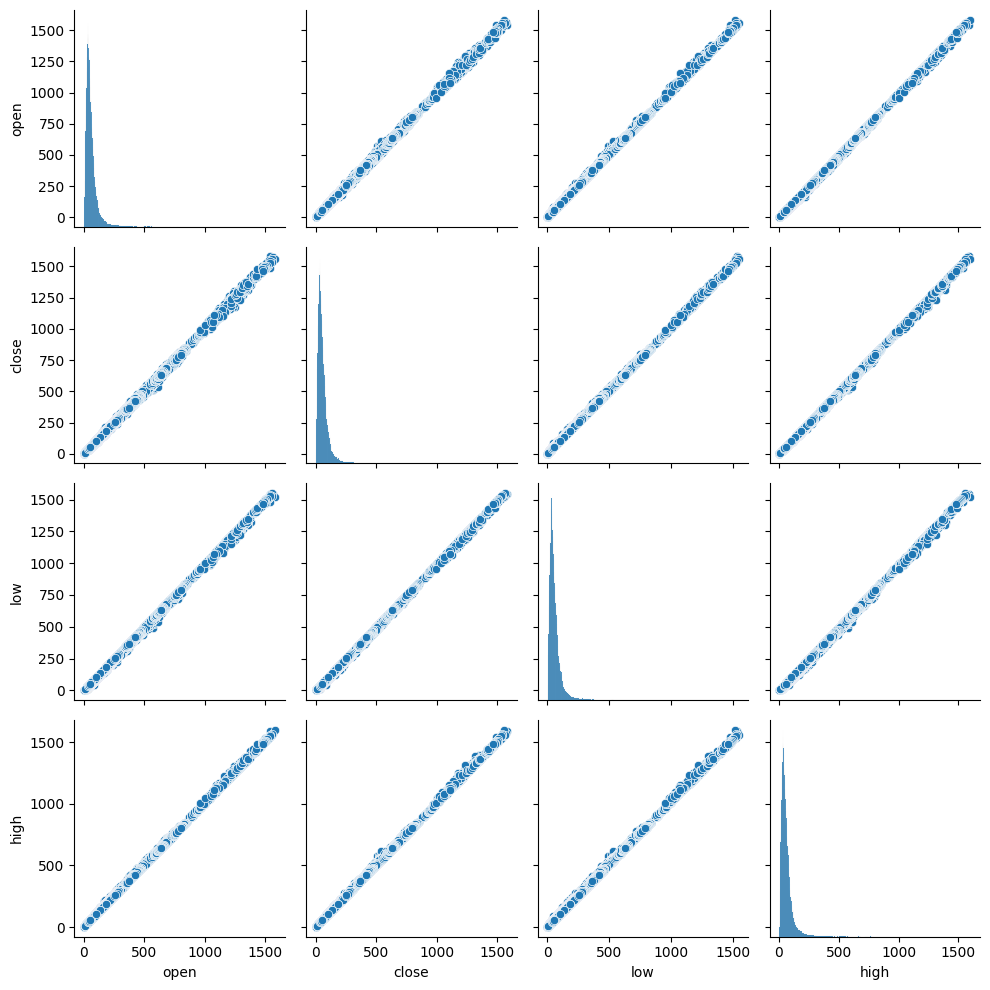

In [32]:
sns.pairplot(df)
plt.tight_layout()
## pairplot tells us wheather there are any linear relationship between the the data if so we can use
## some linear model predictions
## our output show we have strong linear relation among the dataset so we can use the linear model

In [41]:
## choosing the values for the featues
## lets take some amount of values of the model prediction
import random
sample =df.sample(frac=0.1)
## lets check the size of our sample data set we have takn form the population
sample.shape
## this amount looks fine for training the data
X = sample.drop(['close'], axis=1)
y = sample['close']

Since range of data in different columns veries significantly we need to scale the independent variable i.e. X. For this we will use Min-Max Scaling.

In [42]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()


,open,low,high
0,0.026342,0.026316,0.026259
1,0.028542,0.028736,0.028426
2,0.033006,0.033408,0.032883
3,0.034559,0.034605,0.034471
4,0.114762,0.108351,0.115639


Prediction Model

In [43]:
#now lets split data in test train pairs

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=False)

Acc = [] ## this is for storing all the accuracy values in the model



1. Linear Regression

In [44]:
from sklearn.linear_model import LinearRegression

# model training

model_1 = LinearRegression()
model_1.fit(X_train, y_train)

LinearRegression()

In [45]:
# prediction
y_pred_1 = model_1.predict(X_test)
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_1})
pred_df.head()
## seems like our model predict the values so close

,Actual,Predicted
693002,38.830002,38.476038
656969,104.199997,103.758702
6307,28.730491,28.634392
111588,10.325000,10.333909
491479,38.689999,38.645784


In [46]:
# Measure the Accuracy Score

from sklearn.metrics import r2_score

print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred_1)))
Acc.append(r2_score(y_test, y_pred_1))

Accuracy score of the predictions: 0.999942415420553


2.ANN

In [48]:

from keras.models import Sequential
from keras.layers import Dense

def regressor(inp_dim):

    model = Sequential()
    ## this is neural network model model we adding the middle layes of the nertwokr
    model.add(Dense(20, input_dim=inp_dim, kernel_initializer='normal', activation='relu'))
    model.add(Dense(25, kernel_initializer='normal', activation='relu'))
    model.add(Dense(10, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))

    model.compile(loss='mean_squared_error', optimizer='adam')

    return model



In [49]:
# Model Training
model_2 = regressor(inp_dim=3)
model_2.fit(X_train, y_train, epochs=70, validation_split=0.2)


Epoch 1/70
1703/1703 [==============================] - 6s 3ms/step - loss: 2777.3369 - val_loss: 34.2191
Epoch 2/70
1703/1703 [==============================] - 5s 3ms/step - loss: 9.9421 - val_loss: 2.1157
Epoch 3/70
1703/1703 [==============================] - 5s 3ms/step - loss: 1.0466 - val_loss: 0.8947
Epoch 4/70
1703/1703 [==============================] - 4s 2ms/step - loss: 0.8686 - val_loss: 0.9907
Epoch 5/70
1703/1703 [==============================] - 4s 2ms/step - loss: 0.8805 - val_loss: 0.9185
Epoch 6/70
1703/1703 [==============================] - 5s 3ms/step - loss: 0.9755 - val_loss: 1.7448
Epoch 7/70
1703/1703 [==============================] - 4s 2ms/step - loss: 0.9952 - val_loss: 0.8607
Epoch 8/70
1703/1703 [==============================] - 4s 2ms/step - loss: 0.9610 - val_loss: 1.3204
Epoch 9/70
1703/1703 [==============================] - 5s 3ms/step - loss: 0.9671 - val_loss: 0.9577
Epoch 10/70
1703/1703 [==============================] - 4s 2ms/step - loss: 0

In [50]:
y_pred_2 = model_2.predict(X_test)
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_2.flatten()})
pred_df.head()
## you may woonder we are not using the time features we are first predict the model without the timer series then with time series

533/533 [==============================] - 2s 3ms/step


,Actual,Predicted
693002,38.830002,38.567139
656969,104.199997,103.917542
6307,28.730491,28.507469
111588,10.325000,10.105788
491479,38.689999,38.322273


In [51]:
# Measure the Accuracy Score

from sklearn.metrics import r2_score

print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred_2)))
Acc.append(r2_score(y_test, y_pred_2))

Accuracy score of the predictions: 0.9998678161980208


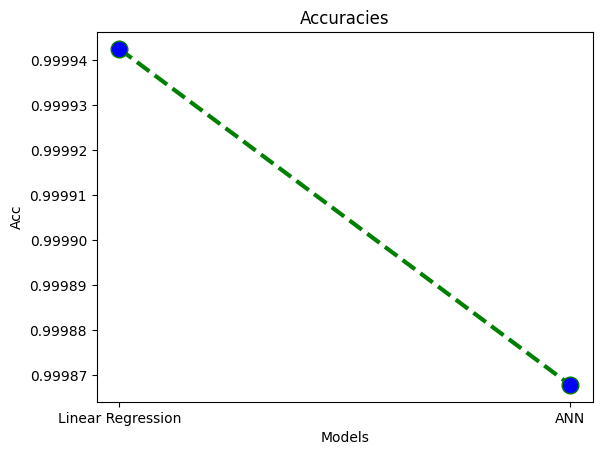

In [52]:
plt.plot(range(2), Acc, color='green', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='blue', markersize=12)
plt.ylabel('Acc')
plt.xlabel('Models')
plt.title("Accuracies")
plt.xticks(range(2), ['Linear Regression', 'ANN'])
plt.show()